# Break linearity example

> Why does neural network rules the fitting power since 2006

![Simple nn view from wikipedia](https://upload.wikimedia.org/wikipedia/commons/e/e4/Artificial_neural_network.svg)

## Dataset
### Simplified Human Activity Recognition w/Smartphone

See the [dataset detail](https://www.kaggle.com/mboaglio/simplifiedhuarus)

> Abstract: Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

> Data Set Characteristics: Multivariate, Time-Series

> Data Set Information:

> The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

> The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

> Check the README.txt file for further details about this dataset.

> An updated version of this dataset can be found at (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) It includes labels of postural transitions between activities and also the full raw inertial signals instead of the ones pre-processed into windows.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.decomposition import PCA

/kaggle/input/simplifiedhuarus/test.csv
/kaggle/input/simplifiedhuarus/train.csv


Install extra [packages](https://github.com/raynardj/forgebox)

In [2]:
!pip install -q forgebox

In [3]:
from forgebox.imports import *
from forgebox.ftorch.prepro import split_df
from forgebox.html import DOM
from forgebox.images.widgets import view_images

## Train data and test(validation) data

In [4]:
# constant
DATA = Path("/kaggle/input/simplifiedhuarus")
VALID_RATIO = .2

def read_data(filename: str) -> pd.DataFrame:return pd.read_csv(DATA/f'{filename}.csv')

total_df = read_data("train")
# train/valid split
train_df, valid_df = split_df(total_df, valid = VALID_RATIO)

test_df = read_data("test")

In [5]:
total_df.sample(10)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
2360,6735,WALKING,0.219,-0.01700,-0.1110,-0.194,-0.1470,-0.283,-0.203,-0.1880,...,0.0255,-0.299,-0.720,0.9400,0.6620,0.3060,-0.1670,-0.843,0.1750,-0.0628
2890,8274,STANDING,0.275,-0.02100,-0.1110,-0.990,-0.9650,-0.993,-0.992,-0.9640,...,0.1190,-0.110,-0.430,0.0180,0.3210,-0.3390,0.6040,-0.801,0.2320,0.0521
3115,8908,SITTING,0.278,-0.01700,-0.1090,-0.999,-0.9940,-0.992,-0.999,-0.9940,...,0.1290,-0.263,-0.634,-0.1980,-0.1880,0.1700,-0.6350,-0.684,-0.0389,-0.1600
2125,6063,STANDING,0.280,-0.01710,-0.1160,-0.996,-0.9790,-0.964,-0.996,-0.9770,...,0.3300,-0.658,-0.911,-0.1400,-0.2010,-0.3180,0.8180,-0.819,0.2230,0.0336
486,1355,SITTING,0.277,-0.01670,-0.1110,-0.997,-0.9930,-0.989,-0.997,-0.9930,...,0.2600,-0.444,-0.784,0.0423,-0.0805,-0.0761,-0.3640,-0.977,0.0828,0.0297
1935,5507,STANDING,0.279,-0.01420,-0.1070,-0.998,-0.9860,-0.987,-0.998,-0.9860,...,0.5260,-0.777,-0.920,-0.0222,-0.0249,0.7790,0.0705,-0.862,0.1820,-0.0308
1442,4145,WALKING_UPSTAIRS,0.334,-0.01860,-0.1460,-0.283,-0.0465,-0.270,-0.301,-0.0739,...,0.3190,-0.492,-0.765,-0.6170,-0.1160,-0.9780,0.3540,-0.468,0.3870,0.2400
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.320,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.181,-0.250,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.2780,0.1800
3418,9746,STANDING,0.291,-0.03390,-0.1800,-0.895,-0.7250,-0.796,-0.911,-0.6970,...,-0.1350,-0.440,-0.811,-0.0976,0.4290,-0.3760,-0.0973,-0.634,0.3470,-0.0286
3060,8758,SITTING,0.281,-0.01470,-0.0994,-0.984,-0.9290,-0.960,-0.987,-0.9360,...,0.3690,-0.533,-0.819,-0.0917,0.3260,0.4170,-0.5400,-0.927,0.1000,0.0722


In [6]:
train_df.vc("activity")

,activity
LAYING,558
STANDING,553
SITTING,497
WALKING,487
WALKING_UPSTAIRS,461
WALKING_DOWNSTAIRS,398


In [7]:
valid_df.vc("activity")

,activity
SITTING,126
LAYING,123
STANDING,115
WALKING,115
WALKING_DOWNSTAIRS,95
WALKING_UPSTAIRS,80


### Visualize data signal pattern

We have 561 input features at our disposal

In [8]:
feature_nums = train_df.query("activity=='LAYING'").values[:200,2:].shape[1]
feature_nums

561

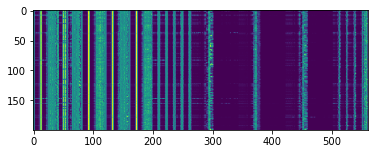

In [9]:
plt.imshow(train_df.query("activity=='LAYING'").values[:200,2:].astype(np.float32))

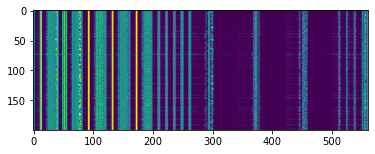

In [10]:
plt.imshow(train_df.query("activity=='STANDING'").values[:200,2:].astype(np.float32))

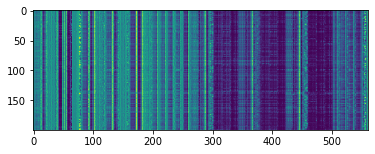

In [11]:
plt.imshow(train_df.query("activity=='WALKING_UPSTAIRS'").values[:200,2:].astype(np.float32))

## Build up dataloader

In [12]:
from torch.utils.data import DataLoader,Dataset

We have a pretty balanced dataset

In [13]:
y_map = dict((v,k) for k,v in enumerate(train_df.vc("activity").index))

Target categories mapped to indices

In [14]:
y_map

{'LAYING': 0,
 'STANDING': 1,
 'SITTING': 2,
 'WALKING': 3,
 'WALKING_UPSTAIRS': 4,
 'WALKING_DOWNSTAIRS': 5}

In [15]:
class ArrayDs(Dataset):
    def __init__(self, df, y_map=y_map):
        self.df = df
        self.y_map = y_map
        self.Xs = self.df.values[:,2:].astype(np.float32)
        if 'activity' in self.df.columns:
            self.has_y = True
            self.Ys = self.df['activity'].apply(lambda x:y_map[x]).values
        else:
            self.has_y = False
        
    def __len__(self): return len(self.df)
    
    def __getitem__(self,idx):
        if self.has_y:
            return self.Xs[idx],self.Ys[idx]
        else:
            return self.Xs[idx]
    
def get_data_dl(df: pd.DataFrame, batch_size: int=128, shuffle=False) -> DataLoader:
    ds = ArrayDs(df)
    return DataLoader(ds, shuffle=shuffle, batch_size=batch_size)

In [16]:
x, y = ArrayDs(train_df,)[6]

x, y

(array([ 0.222  , -0.0427 , -0.123  , -0.254  , -0.0688 , -0.379  ,
        -0.296  , -0.0765 , -0.38   , -0.117  , -0.211  , -0.394  ,
         0.159  , -0.0318 ,  0.397  , -0.177  , -0.72   , -0.831  ,
        -0.823  , -0.361  , -0.211  , -0.367  ,  0.272  ,  0.26   ,
         0.237  , -0.48   ,  0.423  , -0.23   ,  0.198  , -0.333  ,
         0.327  , -0.0314 ,  0.107  , -0.526  ,  0.558  , -0.516  ,
         0.233  , -0.0192 , -0.0017 ,  0.331  ,  0.945  , -0.228  ,
        -0.101  , -0.985  , -0.986  , -0.953  , -0.987  , -0.987  ,
        -0.96   ,  0.876  , -0.246  , -0.0998 ,  0.959  , -0.204  ,
        -0.115  , -0.183  ,  0.85   , -0.915  , -0.978  , -0.989  ,
        -0.989  , -0.971  , -1.     , -1.     , -1.     , -0.301  ,
         0.375  , -0.444  ,  0.507  , -0.0427 ,  0.0378 , -0.0945 ,
         0.173  , -0.477  ,  0.535  , -0.593  ,  0.648  ,  0.534  ,
        -0.835  , -0.681  , -0.283  ,  0.472  ,  0.0112 , -0.248  ,
        -0.197  , -0.6    , -0.21   , -0.141  , 

## Training boiler template

> You can also use sklearn at this part

In [17]:
!pip install -q pytorch-lightning==1.0.4

In [18]:
from pytorch_lightning import LightningDataModule, LightningModule
import pytorch_lightning as pl

class AllData(LightningDataModule):
    def __init__(self):
        super().__init__()
        
    def prepare_data(self):
        self.total_df = read_data("train")
        # train/valid split
        self.train_df, self.valid_df = split_df(
            self.total_df, valid = VALID_RATIO)
        
        self.test_df = read_data("test")
    
    def train_dataloader(self): return get_data_dl(
        self.train_df, shuffle=True)
    
    def val_dataloader(self): return get_data_dl(self.valid_df)
    
    def test_dataloader(self): return get_data_dl(self.test_df)
    

class ltModule(LightningModule):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
        self.crit = nn.CrossEntropyLoss()
        self.accuracy = pl.metrics.Accuracy()
            
    def configure_optimizers(self):
        opt = torch.optim.Adam(self.parameters(), lr=1e-3)
        return opt
    
    def forward(self, x): return self.base_model(x)
    
    def forward_pass(self, batch):
        x, y = batch
        y_ = self(x)
        loss = self.crit(y_,y)
        acc = self.accuracy(y_.argmax(dim=-1),y)
        return {'loss': loss, 'acc':acc}
        
    def training_step(self, batch, batch_idx): return self.forward_pass(batch)
        
    def validation_step(self, batch, batch_idx): return self.forward_pass(batch)
    
    def print_acc(self, outputs, phase):
        avg_acc = torch.stack([x['acc'] for x in outputs]).mean()
        print(f"[{phase}]\tAccuracy:\t{int(avg_acc.item()*100)}%", end="\t")
    
    def training_epoch_end(self, outputs):
        self.print_acc(outputs, "TRAIN")

    def validation_epoch_end(self, outputs):
        self.print_acc(outputs, "VALID")

def learn(base_model, max_epochs=5):
    """
    Train the model automatially, the entire pipeline
    """
    all_data = AllData()
    module = ltModule(base_model)
    trainer = pl.Trainer(max_epochs=max_epochs)
    trainer.fit(model = module, datamodule=all_data, )

## Linear relation

In [19]:
# create linear model
linear_model = nn.Linear(feature_nums,len(y_map))

# learning process
learn(linear_model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params
------------------------------------------------
0 | base_model | Linear           | 3 K   
1 | crit       | CrossEntropyLoss | 0     
2 | accuracy   | Accuracy         | 0     
/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


[VALID]	Accuracy:	27%	

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


[VALID]	Accuracy:	68%	[TRAIN]	Accuracy:	46%	

[VALID]	Accuracy:	80%	[TRAIN]	Accuracy:	76%	

[VALID]	Accuracy:	82%	[TRAIN]	Accuracy:	84%	

[VALID]	Accuracy:	87%	[TRAIN]	Accuracy:	86%	

[VALID]	Accuracy:	87%	[TRAIN]	Accuracy:	88%	


## Break Linearity

> Basic neural network

In [20]:
HIDDEN_SIZE = 512

# create model structure
neural_network = nn.Sequential(
    nn.Linear(feature_nums, HIDDEN_SIZE),
    nn.BatchNorm1d(HIDDEN_SIZE),
    nn.ReLU(),
    nn.Linear(HIDDEN_SIZE, len(y_map))
)

# learning process
learn(neural_network)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params
------------------------------------------------
0 | base_model | Sequential       | 291 K 
1 | crit       | CrossEntropyLoss | 0     
2 | accuracy   | Accuracy         | 0     


[VALID]	Accuracy:	19%	

[VALID]	Accuracy:	86%	[TRAIN]	Accuracy:	84%	

[VALID]	Accuracy:	89%	[TRAIN]	Accuracy:	94%	

[VALID]	Accuracy:	80%	[TRAIN]	Accuracy:	96%	

[VALID]	Accuracy:	91%	[TRAIN]	Accuracy:	97%	

[VALID]	Accuracy:	94%	[TRAIN]	Accuracy:	98%	


## Visualize

### Weights structure

In [21]:
def print_param_shape(model) -> pd.DataFrame:
    """print out the parameter shapes of a model"""
    return pd.DataFrame(list({"name":k, "shape":tuple(p.T.shape)} 
        for k,p in model.named_parameters()))

In [22]:
print_param_shape(linear_model)

,name,shape
0,weight,"(561, 6)"
1,bias,"(6,)"


In [23]:
print_param_shape(neural_network)

,name,shape
0,0.weight,"(561, 512)"
1,0.bias,"(512,)"
2,1.weight,"(512,)"
3,1.bias,"(512,)"
4,3.weight,"(512, 6)"
5,3.bias,"(6,)"


### Find influence

Input features, we print out the first 50 features of our input columns

In [24]:
x_map = np.array(total_df.columns[2:])
print('\t'.join(x_map[:50]))

tBodyAcc.mean.X	tBodyAcc.mean.Y	tBodyAcc.mean.Z	tBodyAcc.std.X	tBodyAcc.std.Y	tBodyAcc.std.Z	tBodyAcc.mad.X	tBodyAcc.mad.Y	tBodyAcc.mad.Z	tBodyAcc.max.X	tBodyAcc.max.Y	tBodyAcc.max.Z	tBodyAcc.min.X	tBodyAcc.min.Y	tBodyAcc.min.Z	tBodyAcc.sma	tBodyAcc.energy.X	tBodyAcc.energy.Y	tBodyAcc.energy.Z	tBodyAcc.iqr.X	tBodyAcc.iqr.Y	tBodyAcc.iqr.Z	tBodyAcc.entropy.X	tBodyAcc.entropy.Y	tBodyAcc.entropy.Z	tBodyAcc.arCoeff.X.1	tBodyAcc.arCoeff.X.2	tBodyAcc.arCoeff.X.3	tBodyAcc.arCoeff.X.4	tBodyAcc.arCoeff.Y.1	tBodyAcc.arCoeff.Y.2	tBodyAcc.arCoeff.Y.3	tBodyAcc.arCoeff.Y.4	tBodyAcc.arCoeff.Z.1	tBodyAcc.arCoeff.Z.2	tBodyAcc.arCoeff.Z.3	tBodyAcc.arCoeff.Z.4	tBodyAcc.correlation.X.Y	tBodyAcc.correlation.X.Z	tBodyAcc.correlation.Y.Z	tGravityAcc.mean.X	tGravityAcc.mean.Y	tGravityAcc.mean.Z	tGravityAcc.std.X	tGravityAcc.std.Y	tGravityAcc.std.Z	tGravityAcc.mad.X	tGravityAcc.mad.Y	tGravityAcc.mad.Z	tGravityAcc.max.X


Output categories

In [25]:
y_map

{'LAYING': 0,
 'STANDING': 1,
 'SITTING': 2,
 'WALKING': 3,
 'WALKING_UPSTAIRS': 4,
 'WALKING_DOWNSTAIRS': 5}

In [26]:
linear_weight = linear_model.weight.data.T
linear_weight, linear_weight.shape

(tensor([[-0.0289, -0.0342, -0.0063,  0.0535,  0.0173,  0.0131],
         [ 0.0153,  0.0114,  0.0441, -0.0519, -0.0760, -0.0072],
         [-0.0165,  0.0282, -0.0022, -0.0003, -0.0733, -0.0364],
         ...,
         [ 0.1058, -0.0874, -0.1345, -0.0538, -0.0384, -0.0784],
         [-0.1187,  0.1129, -0.0106,  0.0588,  0.0483, -0.0284],
         [-0.1122,  0.0559,  0.0169,  0.0593,  0.0422,  0.0154]]),
 torch.Size([561, 6]))

In [27]:
most_influential_rank = linear_weight.abs().sum(-1).argsort(descending=True).numpy()

x_map[most_influential_rank][:30]

array(['fBodyAcc.skewness.X', 'tBodyGyro.correlation.Y.Z',
       'angle.X.gravityMean', 'tGravityAcc.sma', 'tGravityAcc.energy.X',
       'tBodyAcc.correlation.X.Y', 'fBodyAcc.skewness.Z',
       'tGravityAccMag.arCoeff1', 'tBodyGyroJerk.arCoeff.X.1',
       'tBodyAcc.arCoeff.Y.4', 'tBodyGyro.correlation.X.Y',
       'tBodyAccJerk.arCoeff.X.3', 'fBodyAccMag.meanFreq',
       'tBodyAcc.correlation.Y.Z', 'tBodyGyroMag.entropy',
       'fBodyAcc.kurtosis.X', 'tBodyGyroJerk.correlation.X.Z',
       'angle.Y.gravityMean', 'tBodyAccMag.arCoeff2',
       'fBodyAccJerk.mad.Y', 'tBodyGyro.correlation.X.Z',
       'fBodyAcc.meanFreq.Z', 'tGravityAcc.arCoeff.Y.2',
       'tBodyAccJerk.arCoeff.Z.3', 'tBodyGyroJerk.entropy.Y',
       'tGravityAcc.mean.X', 'tGravityAcc.max.X', 'fBodyAcc.meanFreq.X',
       'tBodyGyroJerk.arCoeff.Z.4', 'fBodyAccJerk.maxInds.X'],
      dtype=object)

In [28]:
import plotly.express as px
def plot_heat(w,xname,yname,x,y,x_axis_top=True, height=None):
    pca = PCA(1,)
    new_order = pca.fit_transform(w)[:,0].argsort()
    new_w = w[new_order,:].T

    fig = px.imshow(new_w,
                    labels = dict(x=xname,y=yname),
                    x=x[new_order],y=y)
    if x_axis_top:
        fig.update_xaxes(side="top")
    if height:
        fig.update_layout(height=height)
    fig.show()

### Linear visualize
> We visualize the influences directly from ```input``` features to ```output``` categories

The size of the weights are 561 columns x 6 labels

Here we pick the most influential 30 input features for visualization

In [29]:
plot_heat(
    w=linear_weight[most_influential_rank][:30],
    xname="features",
    yname="activities",
    x=x_map[most_influential_rank][:30],
    y=np.array(list(y_map.keys()))
)

In [30]:
plot_heat(
    w=linear_model.bias.data.numpy()[None,:],
    xname="bias",
    yname="activities",
    x=np.array(["bias_layer",]),
    y=np.array(list(y_map.keys()))
)

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:461: RuntimeWarning:

invalid value encountered in true_divide



In [31]:
neural_network[0],neural_network[3]

(Linear(in_features=561, out_features=512, bias=True),
 Linear(in_features=512, out_features=6, bias=True))

## Break linearity
> But linearity can not simulate a full spectrum of ```OR, AND, XOR``` logic gates, the weight $W_{ij}$ simply tells "the bigger/smaller $X_{i}$ the better for lable $Y_{j}$"

Instead of $X_{i} \times W_{ij} => Y_{j}$, we do $X_{i} \times L1_{ik} => H_{k}, H_{k}\times L2_{kj} => Y_{j}$

> Neural network just using a linear model to fit input into hidden neurons (summarize input features into a middle layer), then use another linear model to fit hidden neurons into output. Hence breaking the linearity.

### Visualize input to hidden layer
> We pick first 80 input features and first 30 hidden neurons to visualize

In [32]:
plot_heat(
    w=neural_network[0].weight.data.T[:80,:30],
    xname="features",
    yname="hidden_feature",
    x=x_map[:80],
    y=np.arange(30)
)

### Visualize hidden layer to output

> We pick first 30 hidden neurons to all our output categories for visualize

In [33]:
plot_heat(
    w=neural_network[3].weight.data.T[:30,:],
    xname="hidden_feature",
    yname="activity",
    x=np.array(list(map(lambda i:f"H{i}",range(30)))),
    y=np.array(list(y_map.keys())),
)